# Data analysis of the pendulum using ML.
The data analysis will be conducted assuming that the physical law for the period of the **simple pendulum** is unknown.

After completing the entire analysis, the result will be compared with the well-known law.


## 1. Reading the dataset and saving it in a dataframe.

In [117]:
import pandas as pd

df = pd.read_csv('dataset_pendulum.csv') 
df.head()

,Period (s),Length (m),Mass (kg),Angle (deg)
0,1.716,0.8,0.2668,10
1,1.676,0.8,0.2668,10
2,1.673,0.8,0.2668,10
3,1.695,0.8,0.2668,10
4,1.733,0.8,0.2668,10


## 2. Understand the shape of the data

In [118]:
print(df.shape)
df.isnull().sum()

(1584, 4)


Period (s)     0
Length (m)     0
Mass (kg)      0
Angle (deg)    0
dtype: int64

Our dataset has 1584 entries and 3 features (lenght, mass and angle) and a target (period). 

We can notice that all the physical quantities are expresses using the SI except for the angle, that I am going to convert in radiants for the analysis, to keep it also expressed in degrees is useful to do filters/cut on the data.

In [119]:
import math
df['Angle (rad)']=df['Angle (deg)']*math.pi/180

### 2.A Exploratory data analysis (EDA)
Build of an histogram for each feature, a scatter plot period-feature and the correlation matrix

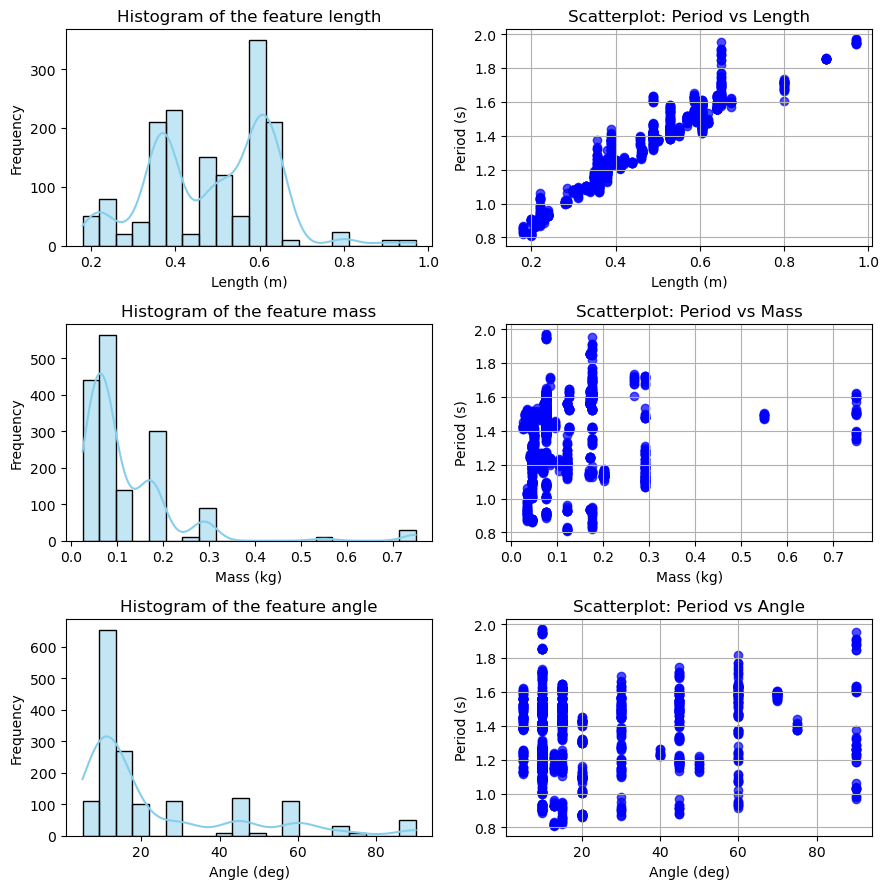

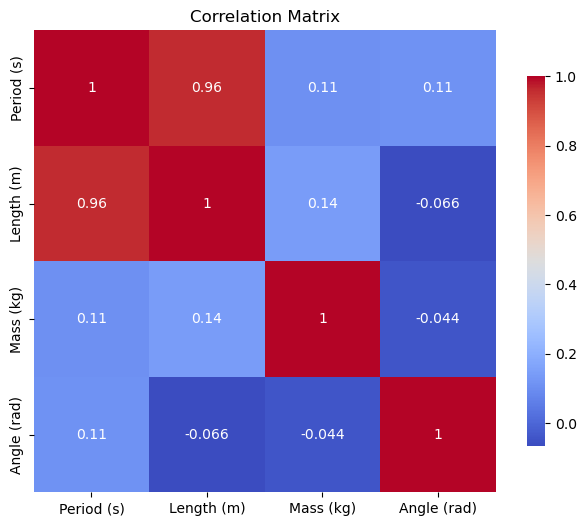

In [120]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(3, 2, figsize=(9, 9))

sns.histplot(df['Length (m)'], bins=20, kde=True, color='skyblue', ax=axes[0,0])
axes[0,0].set_xlabel('Length (m)')
axes[0,0].set_ylabel('Frequency')
axes[0,0].set_title('Histogram of the feature length')

axes[0,1].scatter(df['Length (m)'], df['Period (s)'], color='b', alpha=0.7)
axes[0,1].set_xlabel('Length (m)')
axes[0,1].set_ylabel('Period (s)')
axes[0,1].set_title('Scatterplot: Period vs Length')
axes[0,1].grid(True)


sns.histplot(df['Mass (kg)'], bins=20, kde=True, color='skyblue', ax=axes[1,0])
axes[1,0].set_xlabel('Mass (kg)')
axes[1,0].set_ylabel('Frequency')
axes[1,0].set_title('Histogram of the feature mass')

axes[1,1].scatter(df['Mass (kg)'], df['Period (s)'], color='b', alpha=0.7)
axes[1,1].set_xlabel('Mass (kg)')
axes[1,1].set_ylabel('Period (s)')
axes[1,1].set_title('Scatterplot: Period vs Mass')
axes[1,1].grid(True)


sns.histplot(df['Angle (deg)'], bins=20, kde=True, color='skyblue', ax=axes[2,0])
axes[2,0].set_xlabel('Angle (deg)')
axes[2,0].set_ylabel('Frequency')
axes[2,0].set_title('Histogram of the feature angle')

axes[2,1].scatter(df['Angle (deg)'], df['Period (s)'], color='b', alpha=0.7)
axes[2,1].set_xlabel('Angle (deg)')
axes[2,1].set_ylabel('Period (s)')
axes[2,1].set_title('Scatterplot: Period vs Angle')
axes[2,1].grid(True)


plt.tight_layout()
plt.show()


# Evaluation Correlation Matrix
correlation_matrix = df[['Period (s)', 'Length (m)', 'Mass (kg)', 'Angle (rad)']].corr()

# Visualizzation of the correlation matrix with a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title("Correlation Matrix")
plt.show()

Looking at the plots of the first group and at the correlation matrix, we can notice that the **length** is the feature with the highest correlation to the period, the mass and the angle can be neglected in a first analysis. 

Secondly, in the scatterplot period-length we see that there are some outliers with values of the length too small for their period, probably some mistakes during the collections of the data.

Thirdly, I think that we need to pay attention to the **scatterplot period-angle** because it's clear the lack of correlation for angle less than 20° but it is a bit less clear for angles bigger than 20°.

Finally, the first action that we do: it is to reproduce the scatterplots with a filter on the value of the angle

## 3. Data Cleaning and Data Exploration

FileNotFoundError: [Errno 2] No such file or directory: '/Users/giuseppesinatra/Documents/GitHub/Personal_Projects/4-Pendolum e ML/pythonProject/plots_by_angles.jpg'

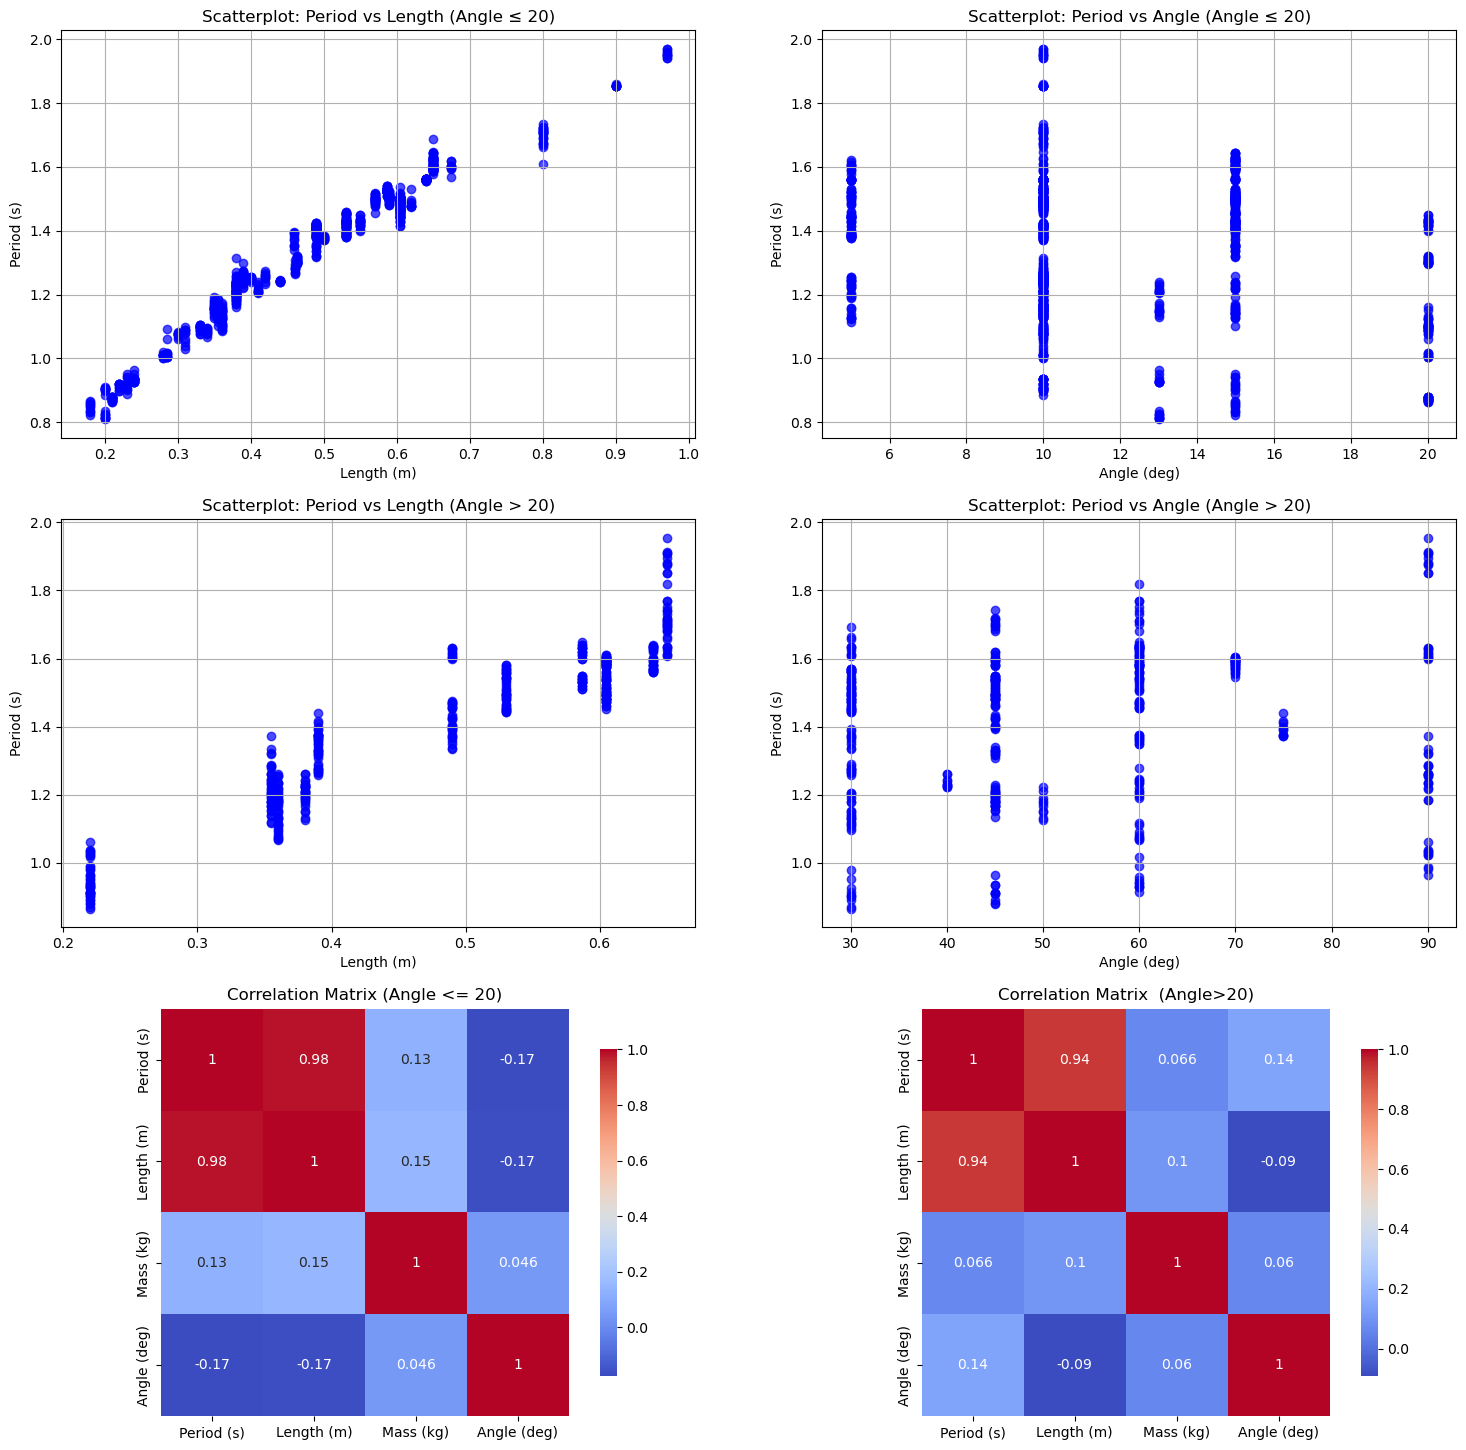

In [121]:
# Filter to select only the entries with Angle <= 20°
filtered_df = df[df['Angle (deg)'] <= 20]


fig, axes = plt.subplots(3, 2, figsize=(18, 18))
axes[0,0].scatter(filtered_df['Length (m)'], filtered_df['Period (s)'], color='b', alpha=0.7)
axes[0,0].set_xlabel('Length (m)')
axes[0,0].set_ylabel('Period (s)')
axes[0,0].set_title('Scatterplot: Period vs Length (Angle ≤ 20)')
axes[0,0].grid(True)

axes[0,1].scatter(filtered_df['Angle (deg)'], filtered_df['Period (s)'], color='b', alpha=0.7)
axes[0,1].set_xlabel('Angle (deg)')
axes[0,1].set_ylabel('Period (s)')
axes[0,1].set_title('Scatterplot: Period vs Angle (Angle ≤ 20)')
axes[0,1].grid(True)

# Filter to select only the entries with Angle > 20°
opposite_df = df[~(df['Angle (deg)'] <= 20)]

axes[1,0].scatter(opposite_df['Length (m)'], opposite_df['Period (s)'], color='b', alpha=0.7)
axes[1,0].set_xlabel('Length (m)')
axes[1,0].set_ylabel('Period (s)')
axes[1,0].set_title('Scatterplot: Period vs Length (Angle > 20)')
axes[1,0].grid(True)

axes[1,1].scatter(opposite_df['Angle (deg)'], opposite_df['Period (s)'], color='b', alpha=0.7)
axes[1,1].set_xlabel('Angle (deg)')
axes[1,1].set_ylabel('Period (s)')
axes[1,1].set_title('Scatterplot: Period vs Angle (Angle > 20)')
axes[1,1].grid(True)

correlation_matrix_1 = filtered_df[['Period (s)', 'Length (m)', 'Mass (kg)', 'Angle (deg)']].corr()
correlation_matrix_2 = opposite_df[['Period (s)', 'Length (m)', 'Mass (kg)', 'Angle (deg)']].corr()

sns.heatmap(correlation_matrix_1, annot=True, cmap='coolwarm', square=True, cbar_kws={"shrink": .8}, ax=axes[2,0])
axes[2,0].set_title("Correlation Matrix (Angle <= 20)")
sns.heatmap(correlation_matrix_2, annot=True, cmap='coolwarm', square=True, cbar_kws={"shrink": .8}, ax=axes[2,1])
axes[2,1].set_title("Correlation Matrix  (Angle>20)")

plt.savefig('pythonProject/plots_by_angles.jpg')
plt.tight_layout()
plt.show()

Looking at the correlation matrix we can see that the correlation between **period and length is 0,98** for small anglese and **0,94 for angles bigger than 20°**, in the first matrix it was 0,96. This suggests us to do a first analysis looking just at the small angles, using as festure just the length. We will use the other features just in a second analysis where we are going to use all the data.

We can also observe that the outliers presented in the first scatterplot period-length are disappeared, another sign of a little correlation between the angle and the period.
Guardando la matrice di correlazione vediamo che la correlazione tra periodo e lunghezza è 0,98 per piccoli angoli e 0,94 per angoli maggiori di 20°, la correlazione con la variabile angolo nella sua interezza era 0,96. Questo ci suggerisce di fare una prima analisi solo per angoli minore di 20° utilizzando come feature solo la lunghezza.

## 4. Data Preprocessing for Model

Usually in the physical laws the features are put in relation through simple operations like division, moltiplication and power, to avoid to do any kind of hypotesis on the shape of the physical law behind the pendulum, it seems reasonably to use the logarithms in this way the moltiplications and divisions will become sums and differences and the exponents will be inside the coefficients of a linear regression. 

In [ ]:
import numpy as np
df['Log_Period']=np.log10(df['Period (s)'])
df['Log_Length']=np.log10(df['Length (m)'])
df['Log_Mass']=np.log10(df['Mass (kg)'])
df['Log_Angle']=np.log10(df['Angle (rad)'])
df.head()

## 5. Model Building (Angle <= 20° and using just the length)

In [ ]:
import statsmodels.api as sm
import numpy as np

filtered_df = df[df['Angle (deg)'] <= 20]
X = filtered_df['Log_Length'].values.reshape(-1, 1)
y = filtered_df['Log_Period'].values


# Add a constant for the errors
X = sm.add_constant(X)  # Add a column of 1 to evaluate the intercepts
model = sm.OLS(y, X)    # Creation of the Linear Regression Model 
results = model.fit()    # Results of the model

slope = results.params[1]
intercept = results.params[0]
slope_error = results.bse[1]
intercept_error = results.bse[0]

print(f"Slope: {slope:.3f} ± {slope_error:.3f}")
print(f"Intercept: {intercept:.3f} ± {intercept_error:.3f}")

X = filtered_df['Log_Length'].values.reshape(-1, 1)
y_regression = slope * X + intercept

plt.scatter(X, y, label='Data')
plt.plot(X, y_regression, color='red', label='Line of Regression')

plt.title('Linear Regression')
plt.xlabel('Log_Length')
plt.ylabel('Log_Period')
plt.legend()
plt.grid(True)
plt.savefig('API_Pendulum/LR_small_angles.jpg')
plt.show()


### 5.A Results for small angles model
Now we need to do a bit of math, we find this law:

$$Log(T)=0.509Log(L)+0.292$$

We need to find the law for T, in this way we can compare this with the well-know pendulum law for small angles:

$$Log(T)=Log(L^{0.509})+0.292\cdot Log (10)$$
$$Log(T)=Log(L^{0.509})+Log (10^{0.292})$$
$$Log(T)=Log(10^{0.292}\cdot L^{0.509})$$
$$ T = 10^{0.292}\cdot L^{0.509} $$

We need to compare this with: $$T=2\pi\sqrt{\frac{L}{g}}=\frac{2\pi}{\sqrt{g}}\sqrt{L}$$
Then we found 0.509 instead of 0.5 with a relative error of the 1.8%, for the other parameter we can compare the prediction for g in our model with 9.8 m/s^2:
$$g_{model}= \frac{4\pi^2}{(10^{0.292})^2}=10.29\ m/s^2$$ with a relative error of the 5%


In [ ]:
Sorted_filtered_df = filtered_df.sort_values(by='Length (m)', ascending=True)

X = Sorted_filtered_df['Length (m)'].values.reshape(-1, 1)
y = Sorted_filtered_df['Period (s)']
y_fit = 10**intercept*(Sorted_filtered_df['Length (m)'])**slope
y_teo = 2*math.pi*(Sorted_filtered_df['Length (m)']/9.8)**0.5

plt.scatter(X, y, label='Data')
plt.plot(X, y_fit, color='red', label='Best Fit')
plt.plot(X, y_teo, color='black', label='Th. function')

plt.title('Comparison between Theory and ML model')
plt.xlabel('Length (m)')
plt.ylabel('Period (s)')
plt.legend()
plt.grid(True)
plt.savefig('API_Pendulum/Comparison_plot_small_angles.jpg')
plt.show()

### 5.B Metrics

We want to evaluate the average error between our model and the theoretical prediction, we will use the standard deviation. 

In [ ]:
df['Teor_pred_sm (T)']=2*math.pi*(df['Length (m)']/9.8)**0.5
df['ML_pred_sm (T)']=10**intercept*(df['Length (m)'])**slope
filtered_df = df[df['Angle (deg)'] <= 20]

quadratic_error_DT = (filtered_df['Teor_pred_sm (T)']-filtered_df['Period (s)'])**2
quadratic_error_TML = (filtered_df['Teor_pred_sm (T)']-filtered_df['ML_pred_sm (T)'])**2
quadratic_error_DML = (filtered_df['Period (s)']-filtered_df['ML_pred_sm (T)'])**2

st_dev_DT=quadratic_error_DT.mean()**0.5
st_dev_TML=quadratic_error_TML.mean()**0.5
st_dev_DML=quadratic_error_DML.mean()**0.5

results = [f'Standard Deviation between data and theoretical prediction: {st_dev_DT:.3f}\n',
           f'Standard Deviation between ML model and theoretical prediction: {st_dev_TML:.3f}\n',
            f'Standard Deviation between ML model and data: {st_dev_DML:.3f}']

print(f'Standard Deviation between data and theoretical prediction: {st_dev_DT:.3f}')
print(f'Standard Deviation between ML model and theoretical prediction: {st_dev_TML:.3f}')
print(f'Standard Deviation between ML model and data: {st_dev_DML:.3f}')

with open('API_Pendulum/results_sa.txt', 'w') as file:
        file.writelines(results)

### 5.C Saving coefficients in a CSV file 

In [ ]:
import csv

with open('API_Pendulum/coefficients_sa.csv', mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['Intercept', 'Slope'])
    writer.writerow([intercept, slope])


## 6. Model Building(Angle <= 20° but using all the features)

In [ ]:
from sklearn.linear_model import LinearRegression

slr = LinearRegression()

X = filtered_df[['Log_Length','Log_Mass','Log_Angle']]
y = filtered_df['Log_Period'].values

slr.fit(X, y)
y_pred = slr.predict(X)

par1 = slr.coef_[0]
par2 = slr.coef_[1]
par3 = slr.coef_[2]

intercept1 = slr.intercept_

print(f"First Parameter (L): {par1:.3f}")
print(f"Second Parameter (M): {par2:.3f}")
print(f"Third Parameter (A): {par3:.3f}")
print(f"Intercept: {intercept1:.3f}")

### 6.A Results for small angles with all the features
From our result we can conferm the indipendece of the Period from small angles, instead we can observe a dipendence from the mass and also the intercept is changed, this is pur new law:

$$Log(T)=0.510Log(L)-0.005Log(M)+0.288$$

With steps like before, we reach this result:

$$ T=10^{0.288}\cdot \frac{L^{0.510}}{M^{0.005}}$$

### 6.B Metrics

In [ ]:
df['ML_pred_sm_alf (T)']=10**intercept1*(df['Length (m)'])**par1/((df['Mass (kg)']**(-par2)))
filtered_df = df[df['Angle (deg)'] <= 20]

quadratic_error_DT = (filtered_df['Teor_pred_sm (T)']-filtered_df['Period (s)'])**2
quadratic_error_TML = (filtered_df['Teor_pred_sm (T)']-filtered_df['ML_pred_sm_alf (T)'])**2
quadratic_error_DML = (filtered_df['Period (s)']-filtered_df['ML_pred_sm_alf (T)'])**2

st_dev_DT=quadratic_error_DT.mean()**0.5
st_dev_TML=quadratic_error_TML.mean()**0.5
st_dev_DML=quadratic_error_DML.mean()**0.5

print(f'Standard Deviation between data and theoretical prediction: {st_dev_DT:.3f}')
print(f'Standard Deviation between ML model and theoretical prediction: {st_dev_TML:.3f}')
print(f'Standard Deviation between ML model and data: {st_dev_DML:.3f}')

## 7. Model Building General Case

In [ ]:
from sklearn.linear_model import LinearRegression

slr = LinearRegression()

X = df[['Log_Length','Log_Mass','Log_Angle']]
y = df['Log_Period'].values

slr.fit(X, y)
y_pred = slr.predict(X)

par1_1 = slr.coef_[0]
par2_1 = slr.coef_[1]
par3_1 = slr.coef_[2]

intercept_1 = slr.intercept_

print('Results of the fit using all the features')
print(f"First Parameter (L): {par1_1:.3f}")
print(f"Second Parameter (M): {par2_1:.3f}")
print(f"Third Parameter (A): {par3_1:.3f}")
print(f"Intercept: {intercept_1:.3f}")


slr = LinearRegression()

X_2 = df[['Log_Length','Log_Angle']]
y = df['Log_Period'].values

slr.fit(X_2, y)
y_pred_2 = slr.predict(X_2)

par1_2 = slr.coef_[0]
par2_2 = slr.coef_[1]

intercept_2 = slr.intercept_

print('\nResults of the fit using the length and the angle')
print(f"First Parameter (L): {par1_2:.3f}")
print(f"Second Parameter (A): {par2_2:.3f}")
print(f"Intercept: {intercept_2:.3f}")

### 7.A Results using all the features without anykind of selection

We can conferm tha now there is a dependece on the angle how it is expect from the theory. This is the equation that describe the period for angles between 0° and 90°:

$$T=2\pi\sqrt{\frac{L}{g}}\bigg(1+\frac{\theta^2}{16}\bigg)$$

It's difficult compare this equation with our result because also using the logaritms, we would have this result:

$$Log(T)=Log\bigg(\frac{2\pi}{\sqrt{g}}\bigg)+\frac{1}{2}Log(L)+Log\bigg(1+\frac{\theta^2}{16}\bigg)$$

Instead with our model we obtain this kind of equation:

$$Log(T)=0.316+0.516Log(L)+0.031Log(\theta)$$
$$T=10^{0.316}\cdot L^{0.516}\cdot \theta^{0.031}$$

Using also the mass, we have:

$$T=10^{0.311}\frac{ L^{0.518}\cdot \theta^{0.03}}{M^{0.006}}$$

### 7.B Metrics

In [ ]:
df['ML_pred (T)']=10**intercept_2*(df['Length (m)'])**par1_1*(df['Angle (rad)'])**par3_1/((df['Mass (kg)']**(-par2_1)))
df['Teor_pred (T)']=2*math.pi*(df['Length (m)']/9.8)**0.5*(1+df['Angle (rad)']/16)

quadratic_error_DT = (df['Teor_pred (T)']-df['Period (s)'])**2
quadratic_error_TML = (df['Teor_pred (T)']-df['ML_pred (T)'])**2
quadratic_error_DML = (df['Period (s)']-df['ML_pred (T)'])**2

st_dev_DT=quadratic_error_DT.mean()**0.5
st_dev_TML=quadratic_error_TML.mean()**0.5
st_dev_DML=quadratic_error_DML.mean()**0.5

print(f'Standard Deviation between data and theoretical prediction: {st_dev_DT:.3f}')
print(f'Standard Deviation between ML model and theoretical prediction: {st_dev_TML:.3f}')
print(f'Standard Deviation between ML model and data: {st_dev_DML:.3f}')

### 7.C Saving Coefficients in a CSV file

In [ ]:
import csv

with open('API_Pendulum/coefficients.csv', mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['Intercept', 'First Parameter(L)', 'Second Parameter (M)', 'Third Parameter (A)'])
    writer.writerow([intercept_1, par1_1, par2_1, par3_1])
